# Primordial Element Formation, Primordial Magnetic Fields, and the Isotropy of the Universe by Thorne
##  Geoff Cope
##  Univeristy of Utah
##  December 26, 2021

"All attempts to understand how galactic magnetic fields could have 
arisen since the big bang creation of the universe face difficulties 
which seem to be insurmountable" ... . Section III 

http://adsabs.harvard.edu/full/1967ApJ...148...51T

In [1]:
from sympy import init_session
init_session(use_latex=True)

IPython console for SymPy 1.9 (Python 3.8.8-64-bit) (ground types: gmpy)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.9/



In [2]:
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

In [3]:
t,theta,phi,z,dt,dtheta,dphi,dz = symbols( 't theta phi z dt dtheta dphi dz' ) 

In [4]:
A = Function('A')(t)
A

In [5]:
W = Function('W')(t)
W

In [6]:
variables = Matrix( [t,theta,phi,z] )
variables

⎡t⎤
⎢ ⎥
⎢θ⎥
⎢ ⎥
⎢φ⎥
⎢ ⎥
⎣z⎦

In [7]:
differentials = Matrix([dt,dtheta,dphi,dz])
differentials

⎡  dt  ⎤
⎢      ⎥
⎢dtheta⎥
⎢      ⎥
⎢ dphi ⎥
⎢      ⎥
⎣  dz  ⎦

In [8]:
lineElement = expand(dt**2 - A**2 * (dtheta**2 + sinh(theta)**2 * dphi**2 ) - W**2 * dz**2)
lineElement

In [14]:
g = zeros(4)

for i in range(4):
    for j in range(4):
        if i == j:
            g[i,j] = lineElement.coeff( differentials[i],2 ) 
        else:
            g[i,j] = Rational(1,2)*lineElement.coeff( differentials[i]*differentials[j],1 )
            
g

⎡1    0            0           0   ⎤
⎢                                  ⎥
⎢     2                            ⎥
⎢0  -A (t)         0           0   ⎥
⎢                                  ⎥
⎢             2        2           ⎥
⎢0    0     -A (t)⋅sinh (θ)    0   ⎥
⎢                                  ⎥
⎢                              2   ⎥
⎣0    0            0         -W (t)⎦

In [15]:
import sympy

In [16]:
m = sympy.Array(g)
m

⎡1    0            0           0   ⎤
⎢                                  ⎥
⎢     2                            ⎥
⎢0  -A (t)         0           0   ⎥
⎢                                  ⎥
⎢             2        2           ⎥
⎢0    0     -A (t)⋅sinh (θ)    0   ⎥
⎢                                  ⎥
⎢                              2   ⎥
⎣0    0            0         -W (t)⎦

In [17]:
from einsteinpy.symbolic import *

In [18]:
syms = sympy.symbols("t theta phi z")
t,theta,phi,z = syms

In [20]:
metric = MetricTensor(m,syms)

In [21]:
ch = ChristoffelSymbols.from_metric(metric)
ch.tensor()

⎡                                                                                           
⎢                                                           ⎡          d                    
⎢⎡0        0                  0                   0      ⎤  ⎢          ──(A(t))             
⎢⎢                                                       ⎥  ⎢          dt                   
⎢⎢        d                                              ⎥  ⎢   0      ────────         0   
⎢⎢0  A(t)⋅──(A(t))            0                   0      ⎥  ⎢            A(t)               
⎢⎢        dt                                             ⎥  ⎢                               
⎢⎢                                                       ⎥  ⎢d                              
⎢⎢                           2    d                      ⎥  ⎢──(A(t))                       
⎢⎢0        0        A(t)⋅sinh (θ)⋅──(A(t))        0      ⎥  ⎢dt                             
⎢⎢                                dt                     ⎥  ⎢──────── 

In [22]:
Ric = RicciTensor.from_metric(metric)
Ric.tensor()

⎡    2             2                                                                        
⎢   d             d                                                                         
⎢  ───(W(t))   2⋅───(A(t))                                                                  
⎢    2             2                                                                        
⎢  dt            dt                                                                         
⎢- ───────── - ───────────                              0                                   
⎢     W(t)         A(t)                                                                     
⎢                                                                                           
⎢                                                 d        d                                
⎢                                  2         A(t)⋅──(A(t))⋅──(W(t))             2           
⎢                                 d               dt       dt         

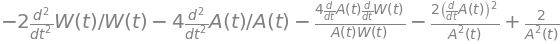

In [23]:
R = RicciScalar.from_riccitensor(Ric)
R.simplify()
R.expr

In [24]:
einst = EinsteinTensor.from_metric(metric)
einst.tensor()

⎡                                      2                                                    
⎢    d        d              ⎛d       ⎞                                                     
⎢2.0⋅──(A(t))⋅──(W(t))   1.0⋅⎜──(A(t))⎟                                                     
⎢    dt       dt             ⎝dt      ⎠      1                                              
⎢───────────────────── + ─────────────── - ─────                                            
⎢      A(t)⋅W(t)               2            2                                               
⎢                             A (t)        A (t)                                            
⎢                                                                                           
⎢                                                     ⎛      2             2                
⎢                                                     ⎜     d             d                 
⎢                                                     ⎜  2⋅───(W(t))  

In [25]:
rm1 = RiemannCurvatureTensor.from_christoffels(ch)
rm1.tensor()

⎡                                        ⎡                        2            ⎤            
⎢                                        ⎢                       d             ⎥            
⎢                                        ⎢       0         A(t)⋅───(A(t))  0  0⎥            
⎢                                        ⎢                        2            ⎥            
⎢         ⎡0  0  0  0⎤                   ⎢                      dt             ⎥            
⎢         ⎢          ⎥                   ⎢                                     ⎥            
⎢         ⎢0  0  0  0⎥                   ⎢        2                            ⎥            
⎢         ⎢          ⎥                   ⎢       d                             ⎥            
⎢         ⎢0  0  0  0⎥                   ⎢-A(t)⋅───(A(t))        0         0  0⎥            
⎢         ⎢          ⎥                   ⎢        2                            ⎥            
⎢         ⎣0  0  0  0⎦                   ⎢      dt                    

In [26]:
weyl = WeylTensor.from_metric(metric)
weyl.tensor()

⎡                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                     